In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score #Confusion matrix 수업 때 진행할 예정 
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import os

In [15]:
data=pd.read_csv('../last.csv')
data=data.drop('Unnamed: 0',axis=1)
data['total_sleep_time']=data['lightsleepduration']+data['deepsleepduration']+data['remsleepduration']
data['deepsleepduration']=data['deepsleepduration']/data['total_sleep_time']
data['sleep_classes'] = data['deepsleepduration'].apply(lambda x: 1 if x>=0.27 else 0)

In [16]:
col=data.columns[3:-1]
X=data[col]
X=X.drop(['caffeine','alcohol','remsleepduration','lightsleepduration','deepsleepduration','total_sleep_time','sleep_score','startDt', 'endDt',
       'lastUpdate'],axis=1)
X=X.fillna(-1)
X = X.clip(lower=0, upper=1e6)
y=data['sleep_classes']

1. hr_average (0.096597)
2. hr_min (0.081140)
3. rr_average (0.068604)
4. breathing_disturbances_intensity (0.067071)
5. wakeupduration (0.061251)
6. snoringepisodecount (0.059431)
7. snoring (0.058204)
8. durationtosleep (0.058203)
9. hr_max (0.054564)
10. rr_min (0.046508)
11. rr_max (0.045888)
12. wakeupcount (0.036622)
13. cAmount(ml) (0.035117)
14. pmEmotion (0.033098)
15. sleepProblem (0.026598)
16. pmFatigue (0.023458)
17. sleep (0.022996)
18. pmStress (0.022237)
19. amCondition (0.022208)
20. durationtowakeup (0.021322)
21. amEmotion (0.021159)
22. aAmount(ml) (0.020415)
23. dream (0.017308)


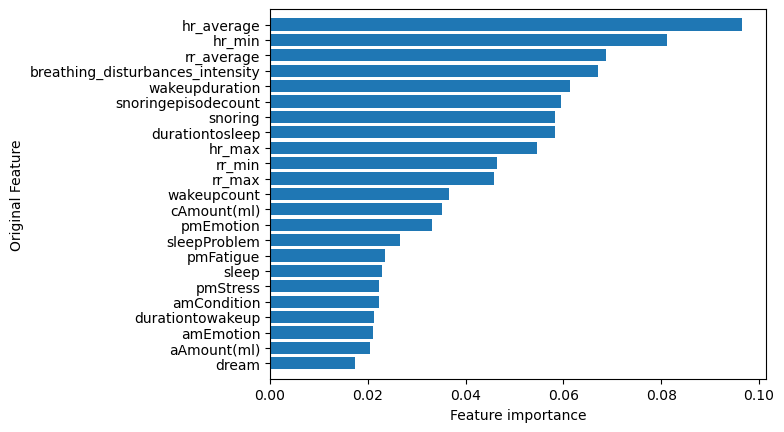

---------------------------------
정확도 :  0.7245508982035929


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X_train.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Original Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)

1. lightsleepduration (0.197065)
2. hr_average (0.077863)
3. hr_min (0.064653)
4. breathing_disturbances_intensity (0.057075)
5. rr_average (0.051351)
6. durationtosleep (0.050784)
7. snoringepisodecount (0.050240)
8. snoring (0.045530)
9. hr_max (0.044258)
10. wakeupduration (0.042606)
11. rr_max (0.038908)
12. rr_min (0.035784)
13. cAmount(ml) (0.030927)
14. wakeupcount (0.030625)
15. pmEmotion (0.023672)
16. sleepProblem (0.023291)
17. pmStress (0.020886)
18. amCondition (0.017864)
19. pmFatigue (0.017830)
20. amEmotion (0.017794)
21. sleep (0.016999)
22. aAmount(ml) (0.015638)
23. dream (0.014282)
24. durationtowakeup (0.014074)


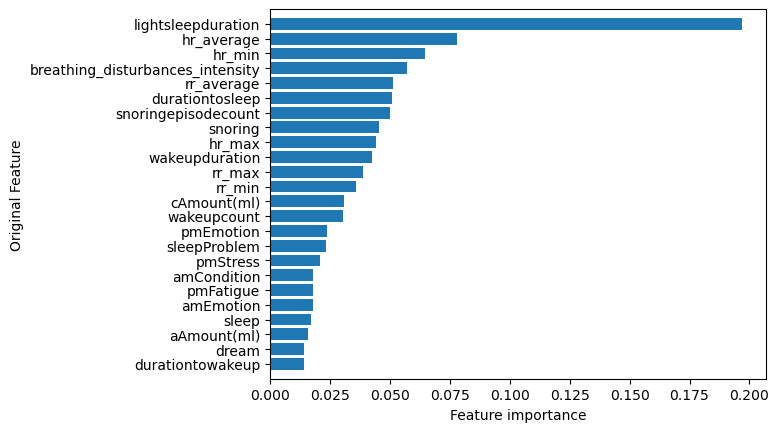

---------------------------------
정확도 :  0.7664670658682635


In [18]:
data=pd.read_csv('../last.csv')
data=data.drop('Unnamed: 0',axis=1)
data['total_sleep_time']=data['lightsleepduration']+data['deepsleepduration']+data['remsleepduration']
data['deepsleepduration']=data['deepsleepduration']/data['total_sleep_time']
data['sleep_classes'] = data['deepsleepduration'].apply(lambda x: 1 if x>=0.27 else 0)
col=data.columns[3:-1]
X=data[col]
X=X.drop(['caffeine','alcohol','remsleepduration','deepsleepduration','total_sleep_time','sleep_score','startDt', 'endDt',
       'lastUpdate'],axis=1)
X=X.fillna(-1)
X = X.clip(lower=0, upper=1e6)
y=data['sleep_classes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X_train.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Original Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)

In [19]:
data=pd.read_csv('../last.csv')
data=data.drop('Unnamed: 0',axis=1)
data['total_sleep_time']=data['lightsleepduration']+data['deepsleepduration']+data['remsleepduration'] 
for x in ['wakeupduration','lightsleepduration', 'deepsleepduration', 'wakeupcount','durationtosleep', 'remsleepduration',
       'breathing_disturbances_intensity', 'snoring', 'snoringepisodecount']:
    data[x]=data[x]/data['total_sleep_time']  
data['sleep_classes'] = data['deepsleepduration'].apply(lambda x: 1 if x>=0.27 else 0)

col=data.columns[3:-1]
X=data[col]
X=X.drop(['caffeine','alcohol','deepsleepduration','total_sleep_time','sleep_score','startDt', 'endDt',
       'lastUpdate'],axis=1)
X=X.fillna(-1)
X = X.clip(lower=0, upper=1e6)
y=data['sleep_classes']

In [20]:
print(len(data[data['deepsleepduration']<0.27]))
print(len(data[data['deepsleepduration']>=0.27]))

255
249


1. lightsleepduration (0.316793)
2. remsleepduration (0.080390)
3. hr_average (0.057137)
4. hr_min (0.049136)
5. snoringepisodecount (0.044411)
6. snoring (0.042618)
7. rr_average (0.040085)
8. wakeupduration (0.039843)
9. breathing_disturbances_intensity (0.039431)
10. durationtosleep (0.038734)
11. rr_min (0.035118)
12. wakeupcount (0.031499)
13. rr_max (0.025509)
14. hr_max (0.023843)
15. cAmount(ml) (0.018334)
16. pmEmotion (0.017400)
17. pmStress (0.013952)
18. pmFatigue (0.012617)
19. sleep (0.012187)
20. amCondition (0.011384)
21. aAmount(ml) (0.011077)
22. amEmotion (0.010771)
23. sleepProblem (0.010353)
24. durationtowakeup (0.009936)
25. dream (0.007442)


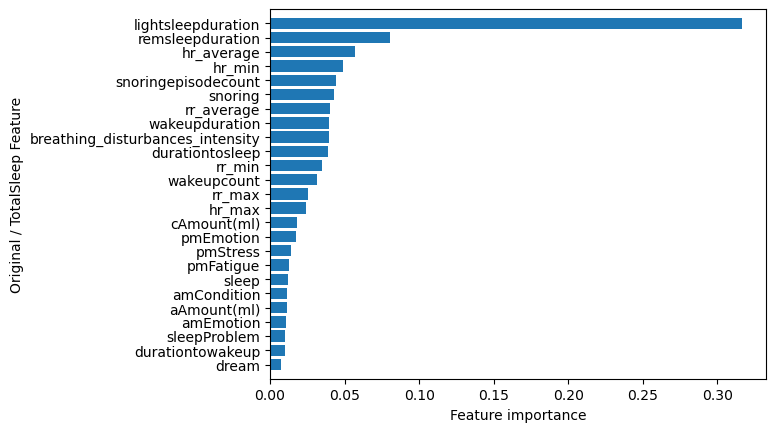

---------------------------------
정확도 :  0.8802395209580839


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X_train.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Original / TotalSleep Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)


In [22]:
data=pd.read_csv('../last.csv')
data=data.drop('Unnamed: 0',axis=1)
data['total_sleep_time']=data['lightsleepduration']+data['deepsleepduration']+data['remsleepduration'] 
for x in ['wakeupduration','lightsleepduration', 'deepsleepduration', 'wakeupcount','durationtosleep', 'remsleepduration',
       'breathing_disturbances_intensity', 'snoring', 'snoringepisodecount']:
    data[x]=data[x]/data['total_sleep_time']  
data['sleep_classes'] = data['deepsleepduration'].apply(lambda x: 1 if x>=0.27 else 0)

col=data.columns[3:-1]
X=data[col]
X=X.drop(['caffeine','alcohol','lightsleepduration','deepsleepduration','total_sleep_time','sleep_score','startDt', 'endDt',
       'lastUpdate'],axis=1)
X=X.fillna(-1)
X = X.clip(lower=0, upper=1e6)
y=data['sleep_classes']

1. hr_average (0.093549)
2. hr_min (0.080752)
3. remsleepduration (0.069945)
4. durationtosleep (0.063284)
5. wakeupduration (0.063233)
6. rr_average (0.059723)
7. wakeupcount (0.057856)
8. breathing_disturbances_intensity (0.054429)
9. snoringepisodecount (0.054212)
10. snoring (0.053500)
11. hr_max (0.048323)
12. rr_min (0.047419)
13. rr_max (0.039925)
14. cAmount(ml) (0.027792)
15. pmEmotion (0.027708)
16. pmFatigue (0.020113)
17. pmStress (0.020101)
18. sleepProblem (0.019811)
19. amCondition (0.018662)
20. sleep (0.018407)
21. durationtowakeup (0.017393)
22. amEmotion (0.015693)
23. dream (0.015111)
24. aAmount(ml) (0.013060)


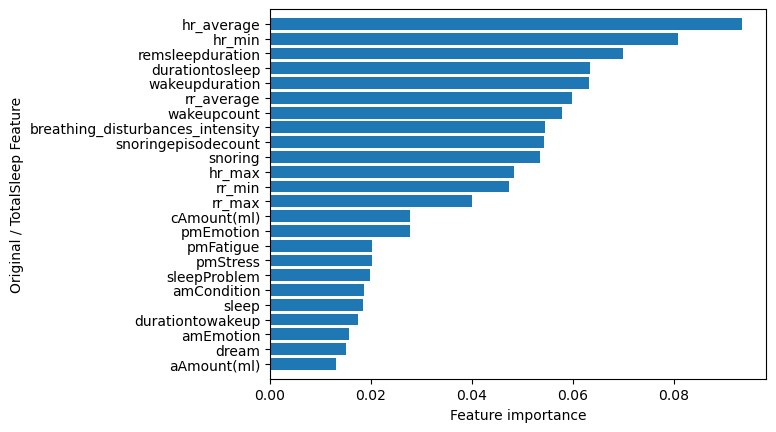

---------------------------------
정확도 :  0.7245508982035929


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X_train.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Original / TotalSleep Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)


Index(['sleep', 'sleepProblem', 'dream', 'amCondition', 'amEmotion',
       'pmEmotion', 'pmStress', 'pmFatigue', 'cAmount(ml)', 'aAmount(ml)',
       'wakeupduration', 'wakeupcount', 'durationtosleep', 'durationtowakeup',
       'hr_average', 'hr_min', 'hr_max', 'rr_average', 'rr_min', 'rr_max',
       'breathing_disturbances_intensity', 'snoring', 'snoringepisodecount'],
      dtype='object')
1. hr_average (0.091318)
2. hr_min (0.078267)
3. wakeupduration (0.069624)
4. durationtosleep (0.068714)
5. rr_average (0.064321)
6. snoringepisodecount (0.060227)
7. wakeupcount (0.056766)
8. snoring (0.056672)
9. breathing_disturbances_intensity (0.054761)
10. hr_max (0.054224)
11. rr_max (0.044697)
12. rr_min (0.044521)
13. cAmount(ml) (0.038408)
14. pmEmotion (0.032547)
15. amCondition (0.027125)
16. pmFatigue (0.024757)
17. sleepProblem (0.021026)
18. pmStress (0.020897)
19. sleep (0.020028)
20. aAmount(ml) (0.019488)
21. durationtowakeup (0.017750)
22. dream (0.017511)
23. amEmotion (0.016

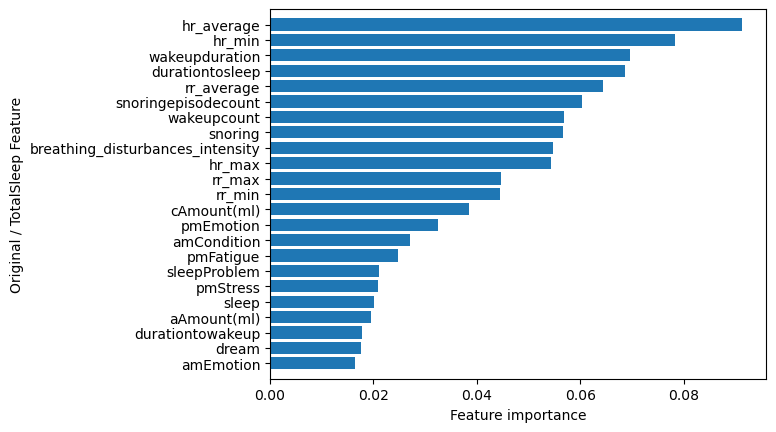

---------------------------------
정확도 :  0.7125748502994012


In [24]:
data=pd.read_csv('../last.csv')
data=data.drop('Unnamed: 0',axis=1)
data['total_sleep_time']=data['lightsleepduration']+data['deepsleepduration']+data['remsleepduration'] 
for x in ['wakeupduration','lightsleepduration', 'deepsleepduration', 'wakeupcount','durationtosleep', 'remsleepduration',
       'breathing_disturbances_intensity', 'snoring', 'snoringepisodecount']:
    data[x]=data[x]/data['total_sleep_time']  
data['sleep_classes'] = data['deepsleepduration'].apply(lambda x: 1 if x>=0.27 else 0)

col=data.columns[3:-1]
X=data[col]
X=X.drop(['caffeine','alcohol','remsleepduration','lightsleepduration','deepsleepduration','total_sleep_time','sleep_score','startDt', 'endDt',
       'lastUpdate'],axis=1)
X=X.fillna(-1)
X = X.clip(lower=0, upper=1e6)
y=data['sleep_classes']
print(X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X_train.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Original / TotalSleep Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)


1. lightsleepduration (0.294981)
2. hr_average (0.067728)
3. snoringepisodecount (0.057796)
4. hr_min (0.053162)
5. wakeupduration (0.052689)
6. durationtosleep (0.049314)
7. breathing_disturbances_intensity (0.043095)
8. rr_average (0.042501)
9. snoring (0.042338)
10. wakeupcount (0.037403)
11. hr_max (0.033042)
12. rr_max (0.032383)
13. rr_min (0.032356)
14. cAmount(ml) (0.019568)
15. pmEmotion (0.018594)
16. pmStress (0.018070)
17. sleepProblem (0.015994)
18. amCondition (0.015470)
19. pmFatigue (0.014735)
20. amEmotion (0.013251)
21. sleep (0.012813)
22. aAmount(ml) (0.012046)
23. durationtowakeup (0.011316)
24. dream (0.009356)


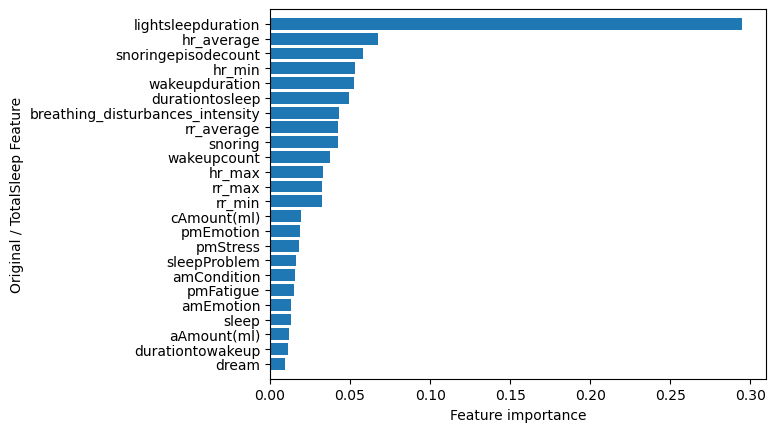

---------------------------------
정확도 :  0.8562874251497006


In [25]:
data=pd.read_csv('../last.csv')
data=data.drop('Unnamed: 0',axis=1)
data['total_sleep_time']=data['lightsleepduration']+data['deepsleepduration']+data['remsleepduration'] 
for x in ['wakeupduration','lightsleepduration', 'deepsleepduration', 'wakeupcount','durationtosleep', 'remsleepduration',
       'breathing_disturbances_intensity', 'snoring', 'snoringepisodecount']:
    data[x]=data[x]/data['total_sleep_time']  
data['sleep_classes'] = data['deepsleepduration'].apply(lambda x: 1 if x>=0.27 else 0)

col=data.columns[3:-1]
X=data[col]
X=X.drop(['caffeine','alcohol','remsleepduration','deepsleepduration','total_sleep_time','sleep_score','startDt', 'endDt',
       'lastUpdate'],axis=1)
X=X.fillna(-1)
X = X.clip(lower=0, upper=1e6)
y=data['sleep_classes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = RandomForestClassifier(random_state=100)
model.fit(X_train, y_train)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))
n_features = X_train.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X_train.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Original / TotalSleep Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)


In [193]:
X_train.columns[indices]

Index(['lightsleepduration', 'hr_average', 'durationtosleep', 'hr_min',
       'rr_average', 'wakeupduration', 'snoringepisodecount',
       'breathing_disturbances_intensity', 'snoring', 'hr_max', 'wakeupcount',
       'rr_max', 'rr_min', 'pmEmotion', 'amEmotion', 'cAmount(ml)',
       'sleepProblem', 'durationtowakeup', 'sleep', 'pmStress', 'pmFatigue',
       'amCondition', 'aAmount(ml)', 'dream'],
      dtype='object')

In [26]:
data=pd.read_csv('../last.csv')
data=data.drop('Unnamed: 0',axis=1)
data['total_sleep_time']=data['lightsleepduration']+data['deepsleepduration']+data['remsleepduration'] 
data['deepsleepduration'] = data['deepsleepduration']/data['total_sleep_time']
data['sleep_classes'] = data['deepsleepduration'].apply(lambda x: 1 if x>=0.27 else 0)
data.head()

,userId,date,endInput,sleep,sleepProblem,dream,amCondition,amEmotion,pmEmotion,pmStress,...,hr_max,rr_average,rr_min,rr_max,breathing_disturbances_intensity,snoring,snoringepisodecount,sleep_score,total_sleep_time,sleep_classes
0,user01,2020-08-30,2020-08-31 8:43,3.0,6.0,2.0,3.0,3.0,4.0,2.0,...,83,16,12,25,18,8880,16,83,25320,0
1,user01,2020-08-31,2020-09-01 10:18,2.0,3.0,2.0,2.0,3.0,4.0,3.0,...,82,16,12,22,20,8280,16,82,23640,1
2,user01,2020-09-02,2020-09-03 11:04,3.0,3.0,2.0,2.0,3.0,4.0,3.0,...,80,16,11,24,20,11400,11,82,25500,1
3,user01,2020-09-03,2020-09-04 12:33,4.0,3.0,2.0,3.0,3.0,2.0,2.0,...,85,16,12,21,14,5280,5,60,21360,1
4,user01,2020-09-04,2020-09-05 10:25,3.0,3.0,4.0,2.0,3.0,4.0,2.0,...,82,16,11,22,15,5460,11,79,25380,1


In [28]:
data=pd.read_csv('../last.csv')
data=data.drop('Unnamed: 0',axis=1)
data['total_sleep_time']=data['lightsleepduration']+data['deepsleepduration']+data['remsleepduration'] 
data['deepsleepduration'] = data['deepsleepduration']/data['total_sleep_time']
data['sleep_classes'] = data['deepsleepduration'].apply(lambda x: 1 if x>=0.27 else 0)
for x in X_train.columns[indices]:
    data1=data[data['sleep_classes']==0][x].mean().round(2)
    data2=data[data['sleep_classes']==1][x].mean().round(2)
    print(x, "|  not good : " ,data1, " |    good :" ,data2)
    print()

lightsleepduration |  not good :  12669.65  |    good : 7776.39

hr_average |  not good :  60.6  |    good : 64.2

snoringepisodecount |  not good :  4.49  |    good : 2.31

hr_min |  not good :  51.29  |    good : 54.06

wakeupduration |  not good :  3194.35  |    good : 3142.65

durationtosleep |  not good :  1828.94  |    good : 2045.3

breathing_disturbances_intensity |  not good :  13.98  |    good : 10.33

rr_average |  not good :  15.28  |    good : 16.29

snoring |  not good :  2558.12  |    good : 1306.51

wakeupcount |  not good :  2.0  |    good : 1.55

hr_max |  not good :  76.3  |    good : 78.42

rr_max |  not good :  22.15  |    good : 22.63

rr_min |  not good :  10.38  |    good : 11.12

cAmount(ml) |  not good :  225.51  |    good : 255.94

pmEmotion |  not good :  3.56  |    good : 3.67

pmStress |  not good :  3.11  |    good : 2.89

sleepProblem |  not good :  1.77  |    good : 1.63

amCondition |  not good :  2.73  |    good : 2.66

pmFatigue |  not good :  2.53  

In [27]:
data1=data[data['sleep_classes']==0].describe().loc['mean'].round(2)
data2=data[data['sleep_classes']==1].describe().loc['mean'].round(2)
t=pd.concat([data1,data2],axis=1)
t.columns=['not good','good']
t.sort_index()

,not good,good
aAmount(ml),99.57,190.04
amCondition,2.73,2.66
amEmotion,3.05,3.07
breathing_disturbances_intensity,13.98,10.33
cAmount(ml),225.51,255.94
deepsleepduration,0.17,0.39
dream,3.06,3.01
durationtosleep,1828.94,2045.30
durationtowakeup,158.12,236.39
hr_average,60.60,64.20


# 2018&2019

In [1]:
pwd

'/home/sh/lab/etritf/jw_data'

In [2]:
cd /home/sh/lab/etritf

/home/sh/lab/etritf


In [5]:
data=pd.read_csv('jw_data/total1819.csv').drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
data['device'].unique()

array(['Fitbit', 'Actigraph'], dtype=object)

In [7]:
data=pd.read_csv('ja_data/total1819.csv').drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
data=data.fillna(-1)
data18=data[data['device']=='Fitbit']
data19=data[data['device']=='Actigraph']
len(data18['userId'].unique()),len(data19['userId'].unique())

(30, 16)

In [8]:
data18.shape, data19.shape

((197401, 30), (199465, 30))

In [92]:
data18['userId'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [24]:
import pandas as pd

data=pd.read_csv('ja_data/total1819.csv').drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
data=data.fillna(-1)
data18=data[data['device']=='Fitbit']
list18 =list(data18['userId'].unique())
# userId가 같은 것끼리 데이터프레임 만들기
for i in range(len(list18)):
    # if data18['userId'] == list18[i]:
    df18 = pd.DataFrame(data18[data18['userId'] == list18[i]])
    #print(list18[i])
    df18.to_csv('jw_data/total18/'+f'{list18[i]}.csv')

In [106]:
import pandas as pd

data=pd.read_csv('ja_data/total1819.csv').drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
data=data.fillna(-1)
data19=data[data['device']=='Actigraph']
list19 =list(data19['userId'].unique())
print(list19)
# userId가 같은 것끼리 데이터프레임 만들기
for i in range(len(list19)):
    data19 = pd.DataFrame(data[data['userId'] == list19[i]])
    print
    data19.to_csv('jw_data/data19/'+f'{list19[i]}.csv')

[102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 118, 119, 120]


In [107]:
action_list =['sleep', 'personal_care', 'work', 'study', 'household', 
              'recreation_media', 'entertainment', 'outdoor_act', 'hobby', 'recreation_etc', 
              'communitiy_interaction', 'travel', 'meal', 'socialising']
DIRNAME =sorted(os.listdir('jw_data/2019_label_date/'))
sleep_dirname = sorted(os.listdir('jw_data/data19/'))
diff_files = [file for file in DIRNAME if file in sleep_dirname]
print(diff_files)
action_option = []
for i in range(len(diff_files)):
    if diff_files[i] == '.ipynb_checkpoints':
        continue
    else:
        base_dir1 = 'jw_data/2019_label_date/'+diff_files[i]
        base_dir2 = 'jw_data/data19/'+diff_files[i]
        label_data = pd.read_csv(base_dir1)
        sleep_data = pd.read_csv(base_dir2)
        datelist = sorted(label_data['date'].unique())
        df =pd.get_dummies(label_data['action'])
        action_df = pd.DataFrame(columns= action_list)
        score = sleep_data[['pmEmotion', 'pmStress',
       'ifUnusual', 'breakfast', 'lunch', 'dinner', 'lateSnack', 'amCaffeine',
       'amCaffAmount', 'pmCaffeine', 'pmCaffAmount', 'alcohol', 'aAmount',
       'date', 'sleep', 'inputDt', 'sleepProblem', 'dream', 'amCondition',
       'amEmotion', 'total_CaffAmount', 'date_m', 'startDt', 'endDt', 
       'sleep_score', 'total_sleep_time', 'time_in_bed', 'waso', 'wakeupcount',
       'aal', 'movement_index', 'fragmentation_index', 'sleep_frag_index']]
       
        print("-------", f"{DIRNAME[i]}", "------------------------------------")
        for j in range(len(datelist)):
            action = pd.DataFrame(data = label_data[label_data['date'] == datelist[j]][-180:], columns =['date','action'])
            action_num_list = action['action'].unique() # 해당 날짜에 수행한 action 리스트
            #print(action_num_list)
            date = action['date'].unique()
            date_action_dict = dict(zip(date, [action_num_list])) # 날짜와 해당하는 action
            for date, action in date_action_dict.items():
                action_df.loc[date, action] = 1
               
        action_df = action_df.fillna(0)
        action_df = action_df.reset_index(drop=True)
        score = score.reset_index(drop=True)
        
        merged_df = pd.concat([action_df, score], axis=1, join='inner')
        merged_df.to_csv('jw_data/total19/'+f"{diff_files[i]}")

['.ipynb_checkpoints', '102.csv', '104.csv', '105.csv', '106.csv', '107.csv', '108.csv', '109.csv', '110.csv', '111.csv', '112.csv', '113.csv', '114.csv', '115.csv', '118.csv', '119.csv', '120.csv']
------- 101.csv ------------------------------------
------- 102.csv ------------------------------------
------- 103.csv ------------------------------------
------- 104.csv ------------------------------------
------- 105.csv ------------------------------------
------- 106.csv ------------------------------------
------- 107.csv ------------------------------------
------- 108.csv ------------------------------------
------- 109.csv ------------------------------------
------- 110.csv ------------------------------------
------- 111.csv ------------------------------------
------- 112.csv ------------------------------------
------- 113.csv ------------------------------------
------- 114.csv ------------------------------------
------- 115.csv ------------------------------------
------

In [47]:
action_list =['sleep', 'personal_care', 'work', 'study', 'household', 
              'recreation_media', 'entertainment', 'outdoor_act', 'hobby', 'recreation_etc', 
              'communitiy_interaction', 'travel', 'meal', 'socialising']
DIRNAME =sorted(os.listdir('jw_data/2018_label_date/'))
sleep_dirname = sorted(os.listdir('jw_data/data18/'))
diff_files = [file for file in DIRNAME if file in sleep_dirname]

action_option = []
for i in range(len(diff_files)):
    if diff_files[i] == '.ipynb_checkpoints':
        continue
    else:
        base_dir1 = 'jw_data/2018_label_date/'+diff_files[i]
        base_dir2 = 'jw_data/data18/'+diff_files[i]
        label_data = pd.read_csv(base_dir1)
        sleep_data = pd.read_csv(base_dir2)
        datelist = sorted(label_data['date'].unique())
        df =pd.get_dummies(label_data['action'])
        action_df = pd.DataFrame(columns= action_list)
        score = sleep_data[['pmEmotion', 'pmStress',
       'ifUnusual', 'breakfast', 'lunch', 'dinner', 'lateSnack', 'amCaffeine',
       'amCaffAmount', 'pmCaffeine', 'pmCaffAmount', 'alcohol', 'aAmount',
       'date', 'sleep', 'inputDt', 'sleepProblem', 'dream', 'amCondition',
       'amEmotion', 'total_CaffAmount', 'date_m', 'startDt', 'endDt', 
       'sleep_score', 'total_sleep_time', 'time_in_bed', 'waso', 'wakeupcount',
       'aal', 'movement_index', 'fragmentation_index', 'sleep_frag_index']]
       
        print("-------", f"{DIRNAME[i]}", "------------------------------------")
        for j in range(len(datelist)):
            action = pd.DataFrame(data = label_data[label_data['date'] == datelist[j]][-180:], columns =['date','action'])
            action_num_list = action['action'].unique() # 해당 날짜에 수행한 action 리스트
            #print(action_num_list)
            date = action['date'].unique()
            date_action_dict = dict(zip(date, [action_num_list])) # 날짜와 해당하는 action
            for date, action in date_action_dict.items():
                action_df.loc[date, action] = 1
               
        action_df = action_df.fillna(0)
        action_df = action_df.reset_index(drop=True)
        score = score.reset_index(drop=True)
        
        merged_df = pd.concat([action_df, score], axis=1, join='inner')
        merged_df.to_csv('jw_data/total18/'+f"{diff_files[i]}")

------- 1.csv ------------------------------------
------- 10.csv ------------------------------------
------- 11.csv ------------------------------------
------- 12.csv ------------------------------------
------- 13.csv ------------------------------------
------- 14.csv ------------------------------------
------- 15.csv ------------------------------------
------- 16.csv ------------------------------------
------- 17.csv ------------------------------------
------- 18.csv ------------------------------------
------- 19.csv ------------------------------------
------- 2.csv ------------------------------------
------- 20.csv ------------------------------------
------- 21.csv ------------------------------------
------- 22.csv ------------------------------------
------- 23.csv ------------------------------------
------- 24.csv ------------------------------------
------- 25.csv ------------------------------------
------- 26.csv ------------------------------------
------- 27.csv

In [48]:
import os
import pandas as pd

DIRNAME = sorted(os.listdir('jw_data/total18/'))
dfs = []
for i in range(len(DIRNAME)):
    if DIRNAME[i] == '.ipynb_checkpoints':
        continue
    else:
        base_dir1 = 'jw_data/total18/'+DIRNAME[i]
        action_label_data = pd.read_csv(base_dir1)
        dfs.append(action_label_data)
   

merged_dfs = pd.concat(dfs, ignore_index=False) 
merged_dfs.to_csv('jw_data/total18.csv')

In [108]:
import os
import pandas as pd

DIRNAME = sorted(os.listdir('jw_data/total19/'))
dfs = []
for i in range(len(DIRNAME)):
    if DIRNAME[i] == '.ipynb_checkpoints':
        continue
    else:
        base_dir1 = 'jw_data/total19/'+DIRNAME[i]
        action_label_data = pd.read_csv(base_dir1)
        dfs.append(action_label_data)
   

merged_dfs = pd.concat(dfs, ignore_index=False) 
merged_dfs.to_csv('jw_data/total19.csv')

1. dream (0.087810)
2. pmStress (0.081743)
3. amEmotion (0.072138)
4. pmEmotion (0.065433)
5. amCondition (0.058972)
6. dinner (0.053858)
7. lateSnack (0.053775)
8. lunch (0.049954)
9. breakfast (0.048536)
10. pmCaffAmount (0.039042)
11. amCaffAmount (0.035310)
12. work (0.033770)
13. household (0.030376)
14. meal (0.030316)
15. recreation_etc (0.029143)
16. aAmount (0.028711)
17. travel (0.028102)
18. study (0.026395)
19. total_CaffAmount (0.023259)
20. recreation_media (0.022343)
21. ifUnusual (0.021771)
22. personal_care (0.021639)
23. communitiy_interaction (0.015111)
24. hobby (0.011809)
25. outdoor_act (0.011494)
26. entertainment (0.009975)
27. socialising (0.007483)
28. sleep (0.001732)


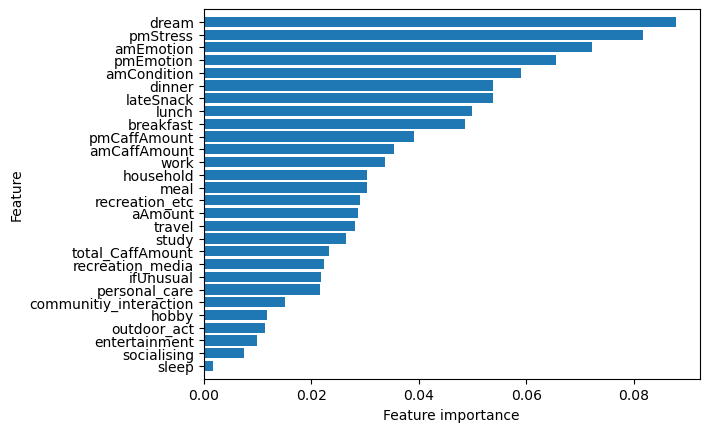

---------------------------------
정확도 :  0.6111111111111112


In [105]:
col=data18.columns[:-1]
X=data18[col]
X=X.drop(['sleep_score','total_sleep_time','sleepProblem','sleep.1','time_in_bed'],axis=1)
y=data18['sleep_classes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
model = RandomForestClassifier(random_state=100)
model.fit(X_train_over, y_train_over)

# 변수 중요도를 계산합니다.
importances = model.feature_importances_
# 변수 중요도를 내림차순으로 정렬합니다.
indices = np.argsort(importances)[::-1]

# 변수 중요도 및 변수 이름을 출력합니다.
for f in range(X_train_over.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train_over.columns[indices[f]], importances[indices[f]]))
n_features = X_train_over.shape[1]
plt.barh(np.arange(n_features),sorted(model.feature_importances_),align='center')
plt.yticks(np.arange(n_features)[::-1],X_train_over.columns[indices])
plt.xlabel("Feature importance")
plt.ylabel('Feature')
plt.ylim(-1,n_features)
plt.show()

predictions=model.predict(X_test)
print("---------------------------------")
print('정확도 : ', accuracy_score(y_test,predictions)) ## 테스트 성능 평가 점수(Accuracy)